# Ejercicio 05
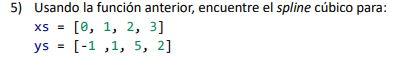

In [3]:
import sympy as sym
from IPython.display import display


def cubic_spline_clamped(
    xs: list[float], ys: list[float], B0: float, B1: float
) -> list[sym.Symbol]:


    points = sorted(zip(xs, ys), key=lambda x: x[0])  
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  
    h = [xs[i + 1] - xs[i] for i in range(n)]  

    alpha = [0] * (n + 1)  
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [2]:
cubic_spline_clamped(
    xs=[0, 1, 2, 3],
    ys=[-1, 1, 5, 2],
    B0=1,
    B1=10,
)

2 5 -3.0 -13.0 13.0
1 1 5.0 5.0 -6.0
0 -1 1.0 -1.0 2.0


[2.0*x**3 - 1.0*x**2 + 1.0*x - 1,
 5.0*x - 6.0*(x - 1)**3 + 5.0*(x - 1)**2 - 4.0,
 -3.0*x + 13.0*(x - 2)**3 - 13.0*(x - 2)**2 + 11.0]